In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [129]:
csv_file = r"C:\Users\Asus\Desktop\refined_dataset\damaged cells\C08_discharge_soh.csv"  # Modify the file path as needed

In [130]:
# Load the CSV file
df = pd.read_csv(csv_file)

In [131]:
# Extract cycle data (X) and SOH data (y)
X = df['cycle'].values
y = df['SOH'].values

In [132]:
# Define the parameter grid for grid search
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.01, 0.1,1,10],
    'gamma': ['scale','auto']
}

In [133]:
# Create SVR model
model = SVR()

In [134]:
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X.reshape(-1, 1), y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [135]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [136]:
# Calculate predicted values using the best model
y_pred = best_model.predict(X.reshape(-1, 1))

In [137]:
# Calculate metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mse)

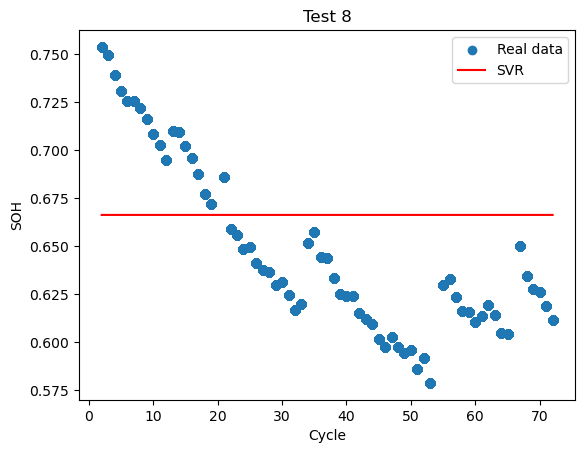

In [138]:
# Plot the data and linear regression line
plt.scatter(X, y, label='Real data')
plt.plot(X, y_pred, color='red', label='SVR')
plt.xlabel('Cycle')
plt.ylabel('SOH')
plt.title('Test 8')
plt.legend()
plt.savefig(r'C:\Users\Asus\Desktop\svr8.png', dpi=600)
plt.show()

In [139]:
# Print best parameters and metrics
print("Best Parameters:", best_params)
print("Mean Squared Error (MSE):", mse*100)
print("Mean Absolute Error (MAE):", mae*10)
print("R2 Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse*10)

Best Parameters: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Mean Squared Error (MSE): 0.2339152072201929
Mean Absolute Error (MAE): 0.4380303021019679
R2 Score: -0.09542451895607096
Root Mean Squared Error (RMSE): 0.48364781320728917
